# 资金流入流出" on Tianchi platform

In [1]:
import pandas as  pd
import numpy as np
import warnings 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
from scipy import stats

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 设置数据集路径

dataset_path = 'Dataset/'

In [4]:
# 读取数据

data_balance = pd.read_csv(dataset_path+'user_balance_table.csv')

In [5]:
# 为数据集添加时间戳

data_balance['date'] = pd.to_datetime(data_balance['report_date'], format= "%Y%m%d")
data_balance['day'] = data_balance['date'].dt.day
data_balance['month'] = data_balance['date'].dt.month
data_balance['year'] = data_balance['date'].dt.year
data_balance['week'] = data_balance['date'].dt.week
data_balance['weekday'] = data_balance['date'].dt.weekday

In [6]:
data_balance.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,...,category1,category2,category3,category4,date,day,month,year,week,weekday
0,1,20140805,20385,20383,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-05,5,8,2014,32,1
1,1,20140808,20391,20389,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-08,8,8,2014,32,4
2,1,20140811,20397,20395,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-11,11,8,2014,33,0
3,1,20140814,20403,20401,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-14,14,8,2014,33,3
4,1,20140817,20409,20407,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-17,17,8,2014,33,6


## 一、时间序列分析

In [7]:
# 聚合时间数据

total_balance = data_balance.groupby(['date'])['total_purchase_amt','total_redeem_amt'].sum().reset_index()


<p align="center">
	  <img 		src="https://i.bmp.ovh/imgs/2020/12/edd3d56a539387a3.png" width = 400>
</p>

In [8]:
# 生成测试集区段数据(时间区段为2014/9/1之后)

start = datetime.datetime(2014,9,1)
testdata = []
while start != datetime.datetime(2014,10,1):
    temp = [start, np.nan, np.nan]
    testdata.append(temp)
    start += datetime.timedelta(days = 1)
testdata = pd.DataFrame(testdata)
testdata.columns = total_balance.columns

In [9]:
# 拼接数据集

total_balance = pd.concat([total_balance, testdata], axis = 0)

In [10]:
# 为数据集添加时间戳

total_balance['day'] = total_balance['date'].dt.day
total_balance['month'] = total_balance['date'].dt.month
total_balance['year'] = total_balance['date'].dt.year
total_balance['week'] = total_balance['date'].dt.week
total_balance['weekday'] = total_balance['date'].dt.weekday

In [11]:
import matplotlib.pylab as plt

<img src = 'https://i.bmp.ovh/imgs/2020/12/a3ff4d0dff0c40ec.png' width = 600/>

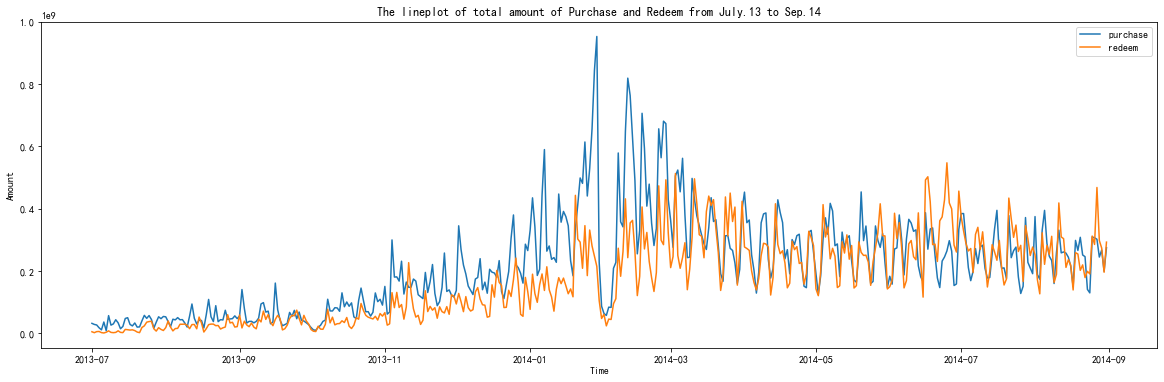

In [12]:
# 画出每日总购买与赎回量的时间序列图

fig = plt.figure(figsize=(20,6))
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],label='purchase')
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],label='redeem')

plt.legend(loc='best')
plt.title("The lineplot of total amount of Purchase and Redeem from July.13 to Sep.14")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

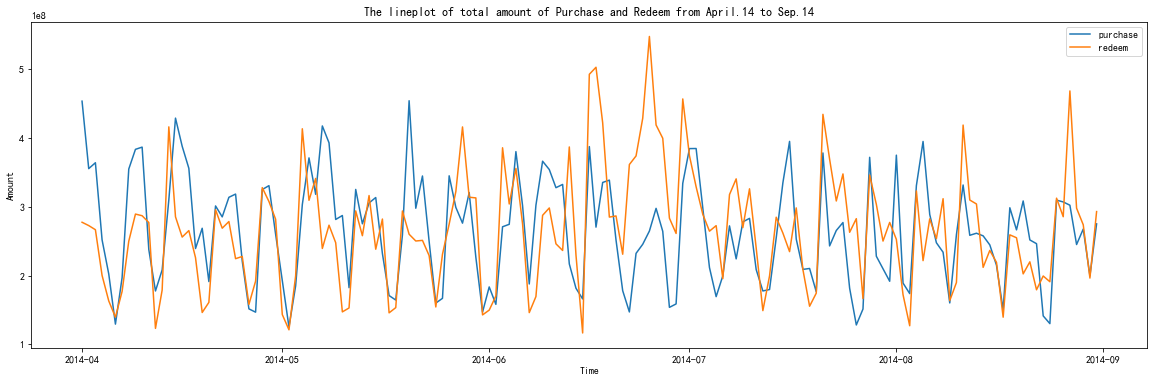

In [13]:
# 画出4月份以后的时间序列图

total_balance_1 = total_balance[total_balance['date'] >= np.datetime64(datetime.date(2014,4,1))]
fig = plt.figure(figsize=(20,6))
plt.plot(total_balance_1['date'], total_balance_1['total_purchase_amt'], label = 'purchase')
plt.plot(total_balance_1['date'], total_balance_1['total_redeem_amt'], label = 'redeem')
plt.legend(loc = 'best')
plt.title("The lineplot of total amount of Purchase and Redeem from April.14 to Sep.14")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

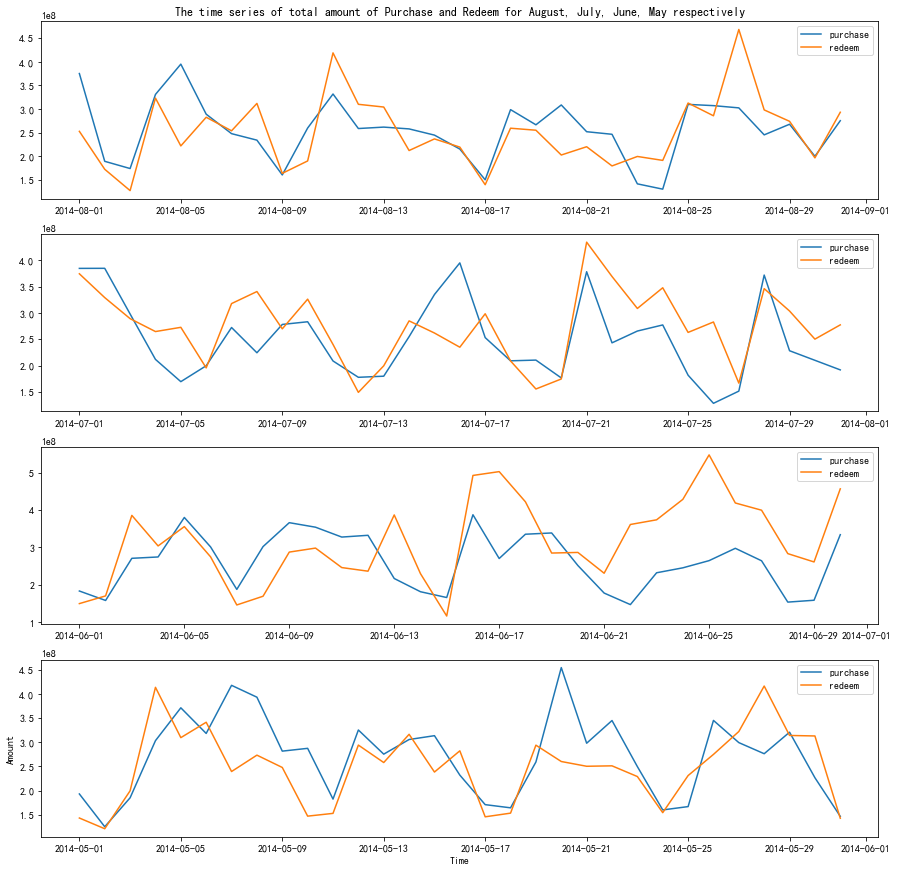

In [14]:
# 分别画出每个月中每天购买赎回量的时间序列图

fig = plt.figure(figsize=(15,15))

plt.subplot(4,1,1)
plt.title("The time series of total amount of Purchase and Redeem for August, July, June, May respectively")

total_balance_2 = total_balance[total_balance['date'] >= np.datetime64(datetime.date(2014,8,1))]
plt.plot(total_balance_2['date'], total_balance_2['total_purchase_amt'], label = 'purchase')
plt.plot(total_balance_2['date'], total_balance_2['total_redeem_amt'], label = 'redeem')
plt.legend()


total_balance_3 = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2014,7,1))) & (total_balance['date'] < np.datetime64(datetime.date(2014,8,1)))]
plt.subplot(4,1,2)
plt.plot(total_balance_3['date'], total_balance_3['total_purchase_amt'], label = 'purchase')
plt.plot(total_balance_3['date'], total_balance_3['total_redeem_amt'], label = 'redeem')
plt.legend()


total_balance_4 = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2014,6,1))) & (total_balance['date'] < np.datetime64(datetime.date(2014,7,1)))]
plt.subplot(4,1,3)
plt.plot(total_balance_4['date'], total_balance_4['total_purchase_amt'], label = 'purchase')
plt.plot(total_balance_4['date'], total_balance_4['total_redeem_amt'], label = 'redeem')
plt.legend()


total_balance_5 = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2014,5,1))) & (total_balance['date'] < np.datetime64(datetime.date(2014,6,1)))]
plt.subplot(4,1,4)
plt.plot(total_balance_5['date'], total_balance_5['total_purchase_amt'], label = 'purchase')
plt.plot(total_balance_5['date'], total_balance_5['total_redeem_amt'], label = 'redeem')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

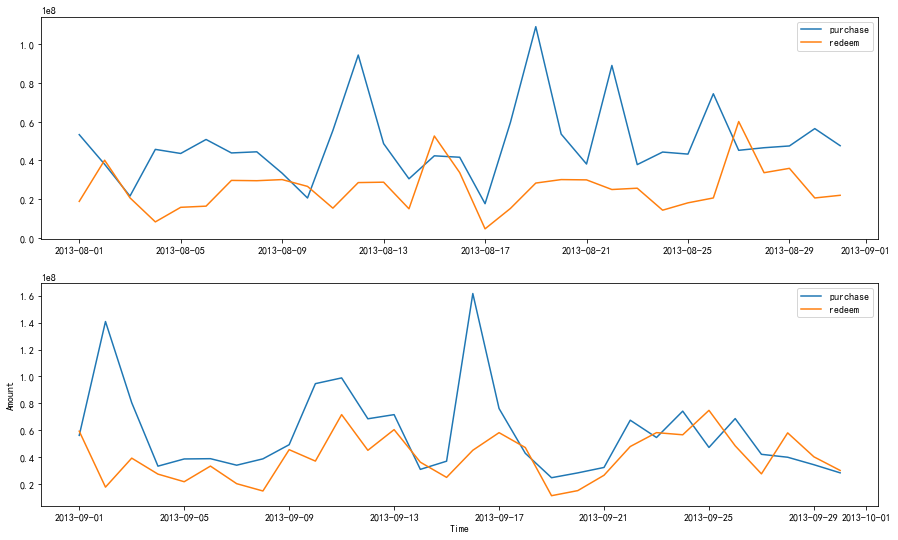

In [15]:
# 分别画出13年8月与9月每日购买赎回量的时序图

fig = plt.figure(figsize=(15,9))

total_balance_last8 = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2013,8,1))) & (total_balance['date'] < np.datetime64(datetime.date(2013,9,1)))]
plt.subplot(2,1,1)
plt.plot(total_balance_last8['date'], total_balance_last8['total_purchase_amt'], label = 'purchase')
plt.plot(total_balance_last8['date'], total_balance_last8['total_redeem_amt'], label = 'redeem')
plt.legend()

total_balance_last9 = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2013,9,1))) & (total_balance['date'] < np.datetime64(datetime.date(2013,10,1)))]
plt.subplot(2,1,2)
plt.plot(total_balance_last9['date'], total_balance_last9['total_purchase_amt'], label = 'purchase')
plt.plot(total_balance_last9['date'], total_balance_last9['total_redeem_amt'], label = 'redeem')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

## 二、翌日特征分析

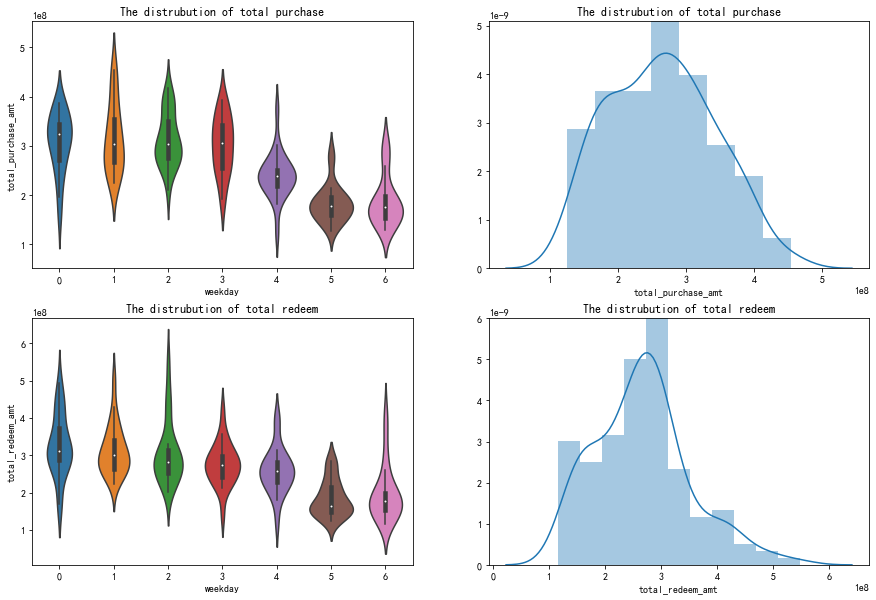

In [16]:
# 画出每个翌日的数据分布于整体数据的分布图

plt.figure(figsize=(15,10))
scatter_para = {'marker':'.', 's':3, 'alpha':0.3}
line_kws = {'color':'k'}
plt.subplot(2,2,1)
plt.title('The distrubution of total purchase')
sns.violinplot(x='weekday', y='total_purchase_amt', data = total_balance_1, scatter_kws=scatter_para, line_kws=line_kws)
plt.subplot(2,2,2)
plt.title('The distrubution of total purchase')
sns.distplot(total_balance_1['total_purchase_amt'].dropna())
plt.subplot(2,2,3)
plt.title('The distrubution of total redeem')
sns.violinplot(x='weekday', y='total_redeem_amt', data = total_balance_1, scatter_kws=scatter_para, line_kws=line_kws)
plt.subplot(2,2,4)
plt.title('The distrubution of total redeem')
sns.distplot(total_balance_1['total_redeem_amt'].dropna())

In [17]:
# 按翌日对数据聚合后取均值

week_sta = total_balance_1[['total_purchase_amt', 'total_redeem_amt', 'weekday']].groupby('weekday', as_index=False).mean()

<img src = 'https://i.bmp.ovh/imgs/2020/12/24c511e59b279b96.png' width = 400 />

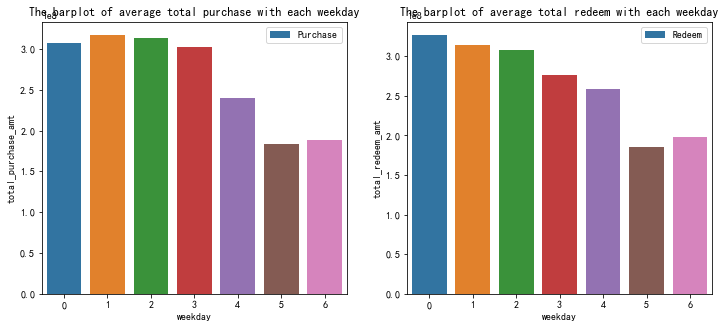

In [18]:
# 分析翌日的中位数特征

plt.figure(figsize=(12, 5))
ax = plt.subplot(1,2,1)
plt.title('The barplot of average total purchase with each weekday')
ax = sns.barplot(x="weekday", y="total_purchase_amt", data=week_sta, label='Purchase')
ax.legend()
ax = plt.subplot(1,2,2)
plt.title('The barplot of average total redeem with each weekday')
ax = sns.barplot(x="weekday", y="total_redeem_amt", data=week_sta, label='Redeem')
ax.legend()


<p align="center">
	  <img 		src="https://img-blog.csdnimg.cn/20190418202726603.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2Fpaml1ZHU=,size_16,color_FFFFFF,t_70
" width = 800>
</p>

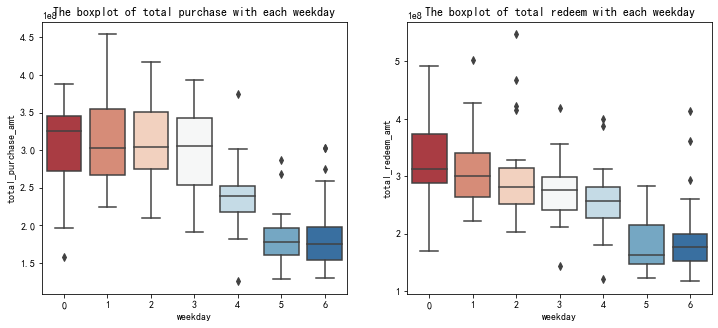

In [19]:
# 画出翌日的箱型图 （箱形图最大的优点就是不受异常值的影响，可以以一种相对稳定的方式描述数据的离散分布情况。）

plt.figure(figsize=(12, 5))
ax = plt.subplot(1,2,1)
plt.title('The boxplot of total purchase with each weekday')
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=total_balance_1,palette = 'RdBu')
ax = plt.subplot(1,2,2)
plt.title('The boxplot of total redeem with each weekday')
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=total_balance_1, palette = 'RdBu')

In [20]:
# 使用OneHot方法将翌日特征划分，获取划分后特征

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
total_balance = total_balance.reset_index()
week_feature = encoder.fit_transform(total_balance['weekday'].ravel().reshape(-1, 1)).toarray() 
# list to array --> https://zhuanlan.zhihu.com/p/261636002
# reshape是在不改变数据内容的情况下，改变一个数组的格式，参数及返回值，reshape(-1,1)令计算机计算出展开所有的行数，然后转换。
week_feature = pd.DataFrame(week_feature,columns=['weekday_onehot']*len(week_feature[0])) # 字符串复制
feature = pd.concat([total_balance, week_feature], axis = 1)[['total_purchase_amt', 'total_redeem_amt','weekday_onehot','date']]
feature.columns = list(feature.columns[0:2]) + [x+str(i) for i,x in enumerate(feature.columns[2:-1])] + ['date']

In [21]:
feature.head()

,total_purchase_amt,total_redeem_amt,weekday_onehot0,weekday_onehot1,weekday_onehot2,weekday_onehot3,weekday_onehot4,weekday_onehot5,weekday_onehot6,date
0,32488348.0,5525022.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-07-01
1,29037390.0,2554548.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2013-07-02
2,27270770.0,5953867.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2013-07-03
3,18321185.0,6410729.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2013-07-04
4,11648749.0,2763587.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2013-07-05


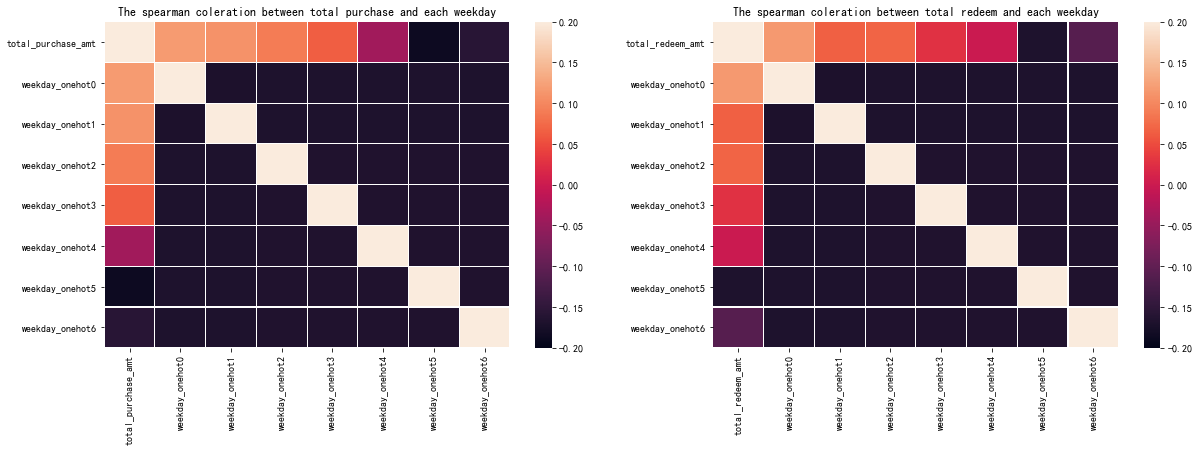

In [22]:
# 画出划分后翌日特征与标签的斯皮尔曼相关性

f, ax = plt.subplots(figsize = (20, 6))
plt.subplot(1,2,1)
plt.title('The spearman coleration between total purchase and each weekday')
sns.heatmap(feature[[x for x in feature.columns if x not in ['total_redeem_amt', 'date'] ]].corr('spearman'),linewidths = 0.1, vmax = 0.2, vmin=-0.2)
plt.subplot(1,2,2)
plt.title('The spearman coleration between total redeem and each weekday')
sns.heatmap(feature[[x for x in feature.columns if x not in ['total_purchase_amt', 'date'] ]].corr('spearman'),linewidths = 0.1,  vmax = 0.2, vmin=-0.2)

In [23]:
# 测试翌日特征与标签的独立性 Ref: https://github.com/ChuanyuXue/MVTest

# pip install mvtest
from mvtpy.mvtest import mvtest
mv = mvtest()
mv.test(total_balance_1['total_purchase_amt'], total_balance_1['weekday'])

{'Tn': 6.75, 'p-value': [0, 0.01]}

## 三、月份特征分析

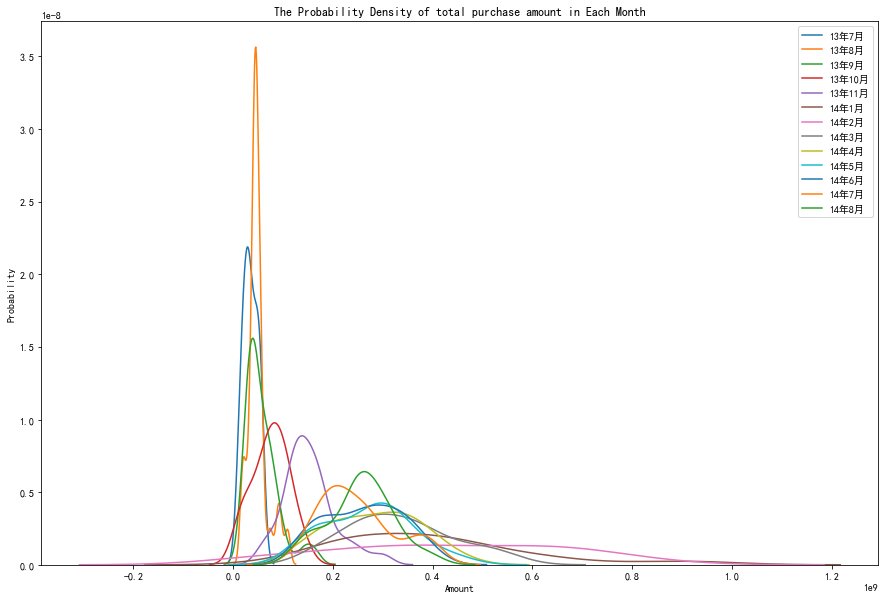

In [24]:
# 画出每个月的购买总量分布估计图(kdeplot)

plt.figure(figsize=(15,10))
plt.title('The Probability Density of total purchase amount in Each Month')
plt.ylabel('Probability')
plt.xlabel('Amount')
for i in range(7, 12):
    sns.kdeplot(total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2013,i,1))) & (total_balance['date'] < np.datetime64(datetime.date(2013,i+1,1)))]['total_purchase_amt'],label='13年'+str(i)+'月')
for i in range(1, 9):
    sns.kdeplot(total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2014,i,1))) & (total_balance['date'] < np.datetime64(datetime.date(2014,i+1,1)))]['total_purchase_amt'],label='14年'+str(i)+'月')

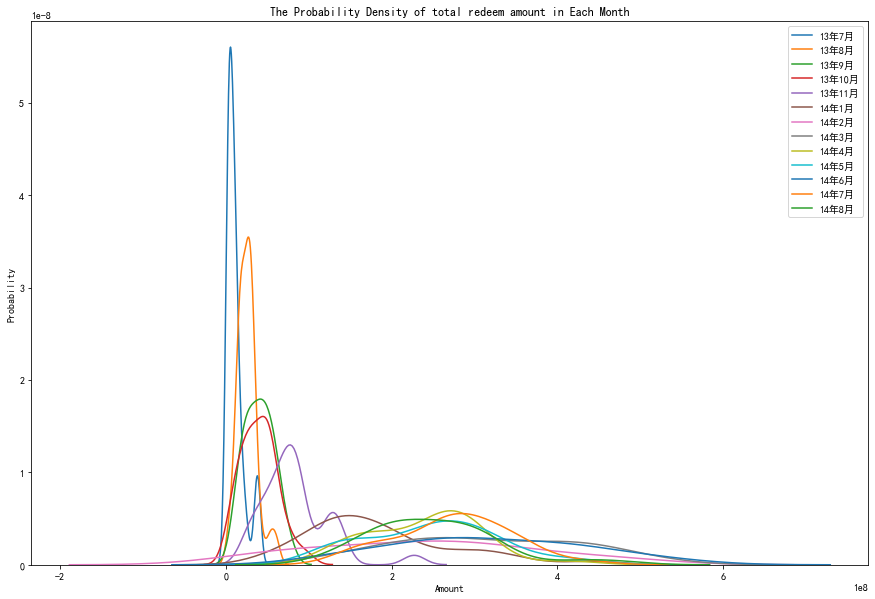

In [25]:
# 画出每个月的赎回总量分布估计图(kdeplot)

plt.figure(figsize=(15,10))
plt.title('The Probability Density of total redeem amount in Each Month')
plt.ylabel('Probability')
plt.xlabel('Amount')
for i in range(7, 12):
    sns.kdeplot(total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2013,i,1))) & (total_balance['date'] < np.datetime64(datetime.date(2013,i+1,1)))]['total_redeem_amt'],label='13年'+str(i)+'月')
for i in range(1, 9):
    sns.kdeplot(total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2014,i,1))) & (total_balance['date'] < np.datetime64(datetime.date(2014,i+1,1)))]['total_redeem_amt'],label='14年'+str(i)+'月')

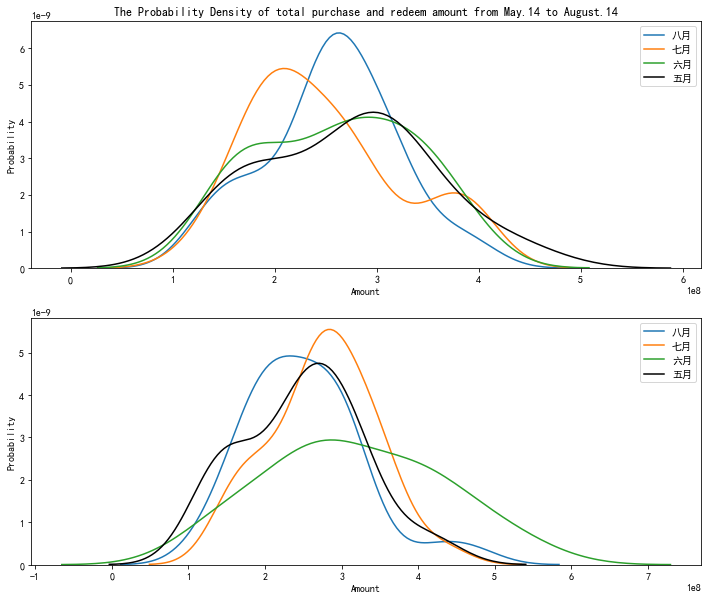

In [26]:
# 画出14年五六七八月份的分布估计图

plt.figure(figsize=(12,10))

ax = plt.subplot(2,1,1)
plt.title('The Probability Density of total purchase and redeem amount from May.14 to August.14')
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_2['total_purchase_amt'],label='八月')
ax = sns.kdeplot(total_balance_3['total_purchase_amt'],label='七月')
ax = sns.kdeplot(total_balance_4['total_purchase_amt'],label='六月')
ax = sns.kdeplot(total_balance_5['total_purchase_amt'],color='Black',label='五月')
ax = plt.subplot(2,1,2)
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_2['total_redeem_amt'],label='八月')
ax = sns.kdeplot(total_balance_3['total_redeem_amt'],label='七月')
ax = sns.kdeplot(total_balance_4['total_redeem_amt'],label='六月')
ax = sns.kdeplot(total_balance_5['total_redeem_amt'],color='Black',label='五月')

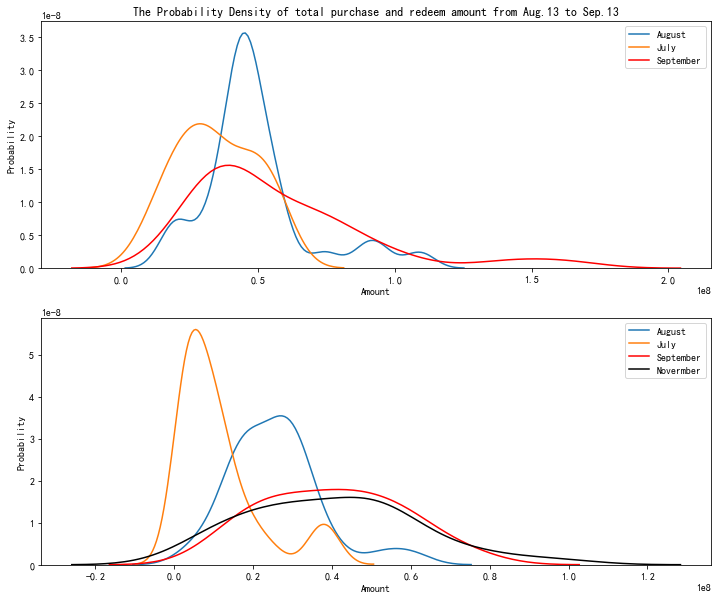

In [27]:
# 画出13年八月到九月份的分布估计图

total_balance_last_7 = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2013,7,1))) & (total_balance['date'] < np.datetime64(datetime.date(2013,8,1)))]
total_balance_last_8 = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2013,8,1))) & (total_balance['date'] < np.datetime64(datetime.date(2013,9,1)))]
total_balance_last_9 = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2013,9,1))) & (total_balance['date'] < np.datetime64(datetime.date(2013,10,1)))]
total_balance_last_10 = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2013,10,1))) & (total_balance['date'] < np.datetime64(datetime.date(2013,11,1)))]
plt.figure(figsize=(12,10))
ax = plt.subplot(2,1,1)
plt.title('The Probability Density of total purchase and redeem amount from Aug.13 to Sep.13')
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_last_8['total_purchase_amt'],label='August')
ax = sns.kdeplot(total_balance_last_7['total_purchase_amt'],label='July')
ax = sns.kdeplot(total_balance_last_9['total_purchase_amt'],color='Red',label='September')

ax = plt.subplot(2,1,2)
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_last_8['total_redeem_amt'],label='August')
ax = sns.kdeplot(total_balance_last_7['total_redeem_amt'],label='July')
ax = sns.kdeplot(total_balance_last_9['total_redeem_amt'],color='Red',label='September')
ax = sns.kdeplot(total_balance_last_10['total_redeem_amt'],color='Black',label='Novermber')

## 四、日期特征分析

In [28]:
# 按照每天聚合数据集

day_sta = total_balance_2[['total_purchase_amt', 'total_redeem_amt', 'day']].groupby('day', as_index=False).mean()

Text(0.5, 1.0, 'The total Purchase in Aug.14')

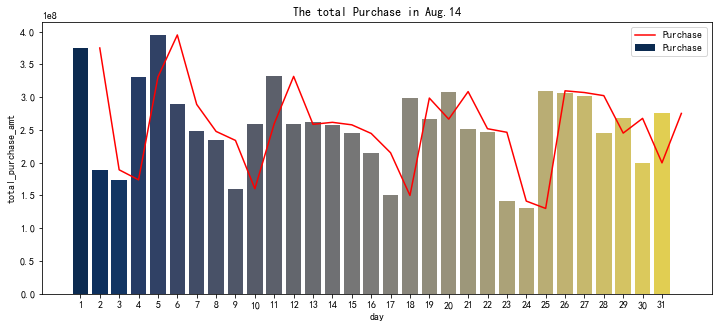

In [29]:
# 获取聚合后每月购买分布的柱状图
plt.figure(figsize = (12,5))
ax = sns.barplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase',palette='cividis')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase', color = 'red')
ax.legend()
plt.title("The total Purchase in Aug.14")

Text(0.5, 1.0, 'The total Redeem in Aug.14')

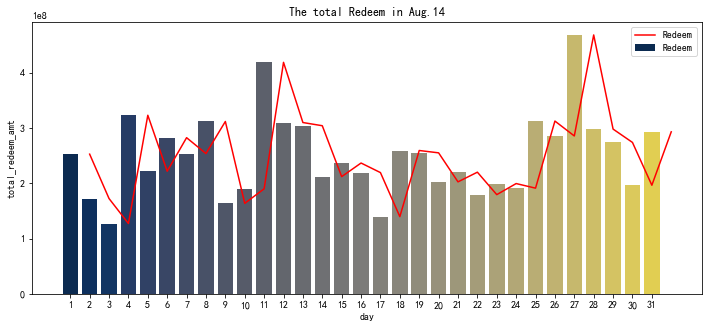

In [30]:
# 获取聚合后每月赎回分布的柱状图
plt.figure(figsize = (12,5))
ax = sns.barplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem', palette='cividis')
ax = sns.lineplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem', color = 'red')
ax.legend()
plt.title("The total Redeem in Aug.14")

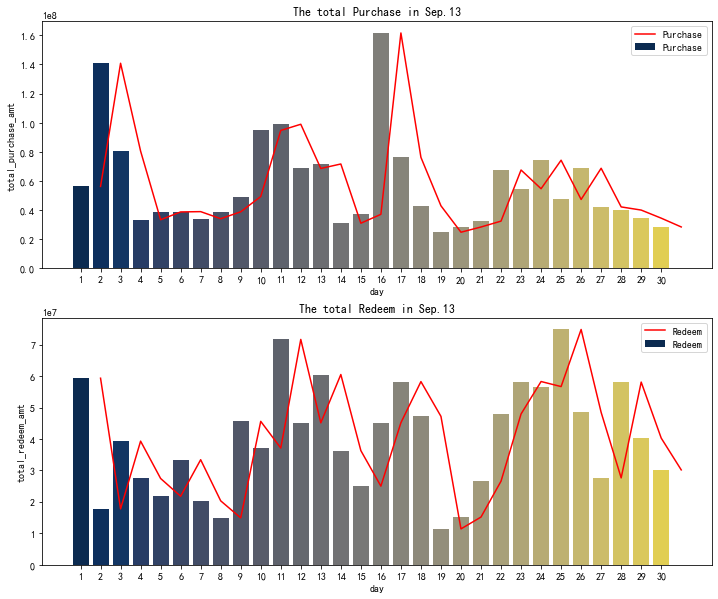

In [31]:
# 画出13年九月份的分布图

plt.figure(figsize=(12,10))
day_sta = total_balance_last_9[['total_purchase_amt', 'total_redeem_amt', 'day']].groupby('day', as_index=False).mean()
plt.subplot(2,1,1)
plt.title("The total Purchase in Sep.13")
ax = sns.barplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase', palette= 'cividis')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase', color = 'red')
plt.subplot(2,1,2)
plt.title("The total Redeem in Sep.13")
bx = sns.barplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem', palette= 'cividis')
bx = sns.lineplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem', color = 'red')
bx.legend()

**We find that the data from last year in Sep has very limited week feature**

There are some strange day in Sep:

1. 1st day
2. 2nd day
3. 16th day(Purchase a lot)---Monday & 3days before MidAutumn Festirval
4. 11th day and 25th day(Redeem a lot)---Both of Wednesday
5. 18 19 20(Both Purchase and Redeem is very low)

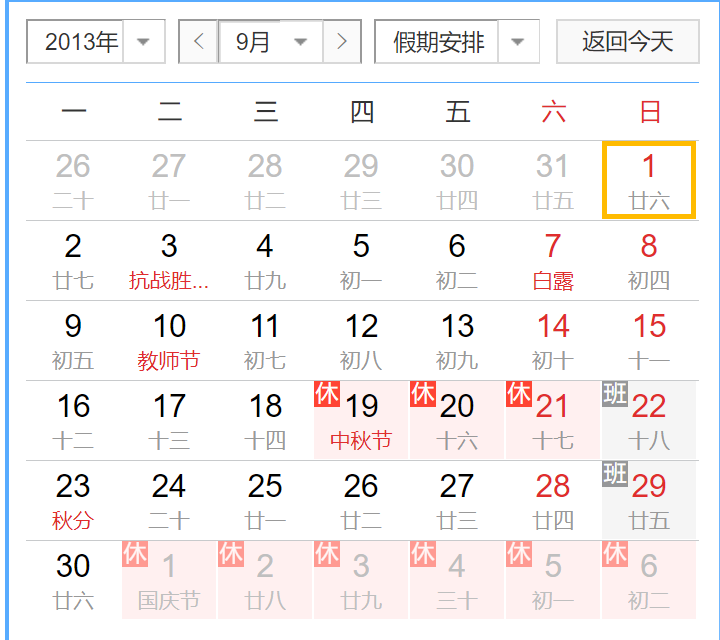

Text(71.0, 0.5, 'week')

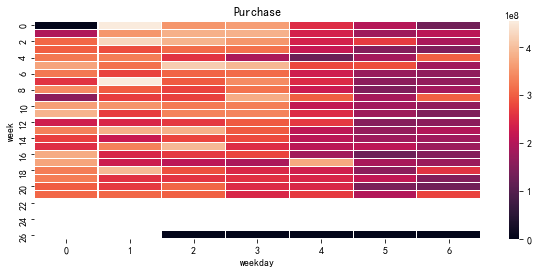

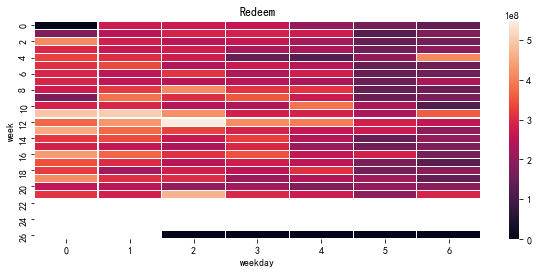

In [32]:
# 画出历史所有天的热力图

test = np.zeros((max(total_balance_1['week']) - min(total_balance_1['week']) + 1, 7))
test[total_balance_1['week'] - min(total_balance_1['week']), total_balance_1['weekday']] = total_balance_1['total_purchase_amt']

f, ax = plt.subplots(figsize = (10, 4))
sns.heatmap(test,linewidths = 0.1, ax=ax)
ax.set_title("Purchase")
ax.set_xlabel('weekday')
ax.set_ylabel('week')

test = np.zeros((max(total_balance_1['week']) - min(total_balance_1['week']) + 1, 7))
test[total_balance_1['week'] - min(total_balance_1['week']), total_balance_1['weekday']] = total_balance_1['total_redeem_amt']

f, ax = plt.subplots(figsize = (10, 4))
sns.heatmap(test,linewidths = 0.1, ax=ax)
ax.set_title("Redeem")
ax.set_xlabel('weekday')
ax.set_ylabel('week')

From the heat map we find that the data of week 4 and weekday 6 is very strange, and week 12 weekday 2 either
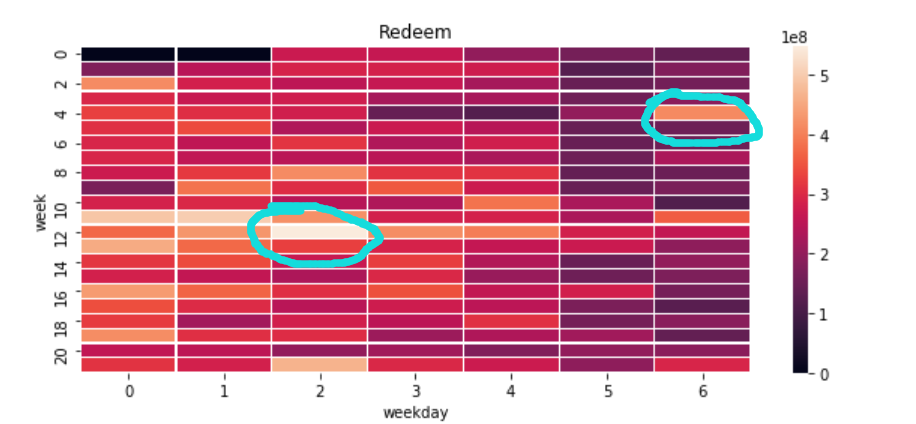

In [33]:
# 对于热力图中异常点的数据分析.1

total_balance_1[(total_balance_1['week'] == 4 + min(total_balance_1['week'])) & (total_balance_1['weekday'] == 6)]

,date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
307,2014-05-04,303087562.0,413222034.0,4,5,2014,18,6


**2014-5-4 is a special day in China, It is the first workday after the Labour day!**
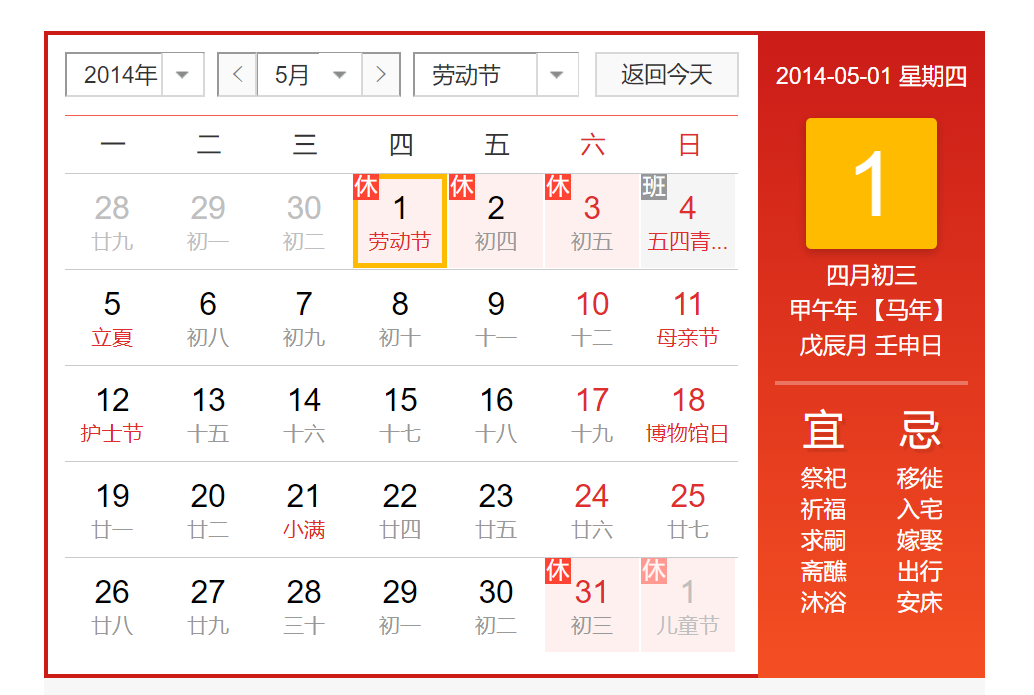

In [34]:
# 对于热力图中异常点的数据分析.2

total_balance_1[(total_balance_1['week'] == 12 + min(total_balance_1['week'])) & (total_balance_1['weekday'] == 2)]

,date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
359,2014-06-25,264663201.0,547295931.0,25,6,2014,26,2


In 2016-06-25 They Redeemed a lot but Purchase a little:
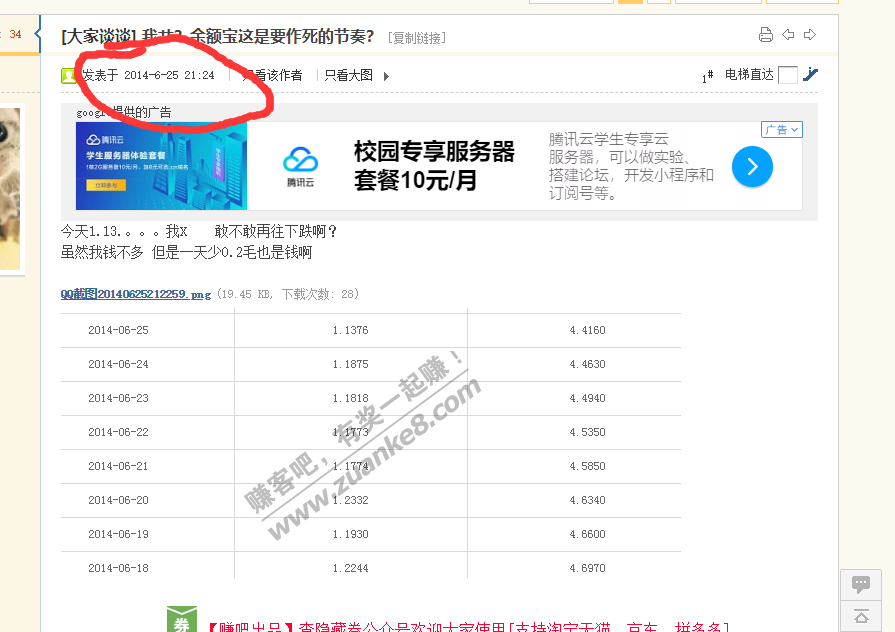

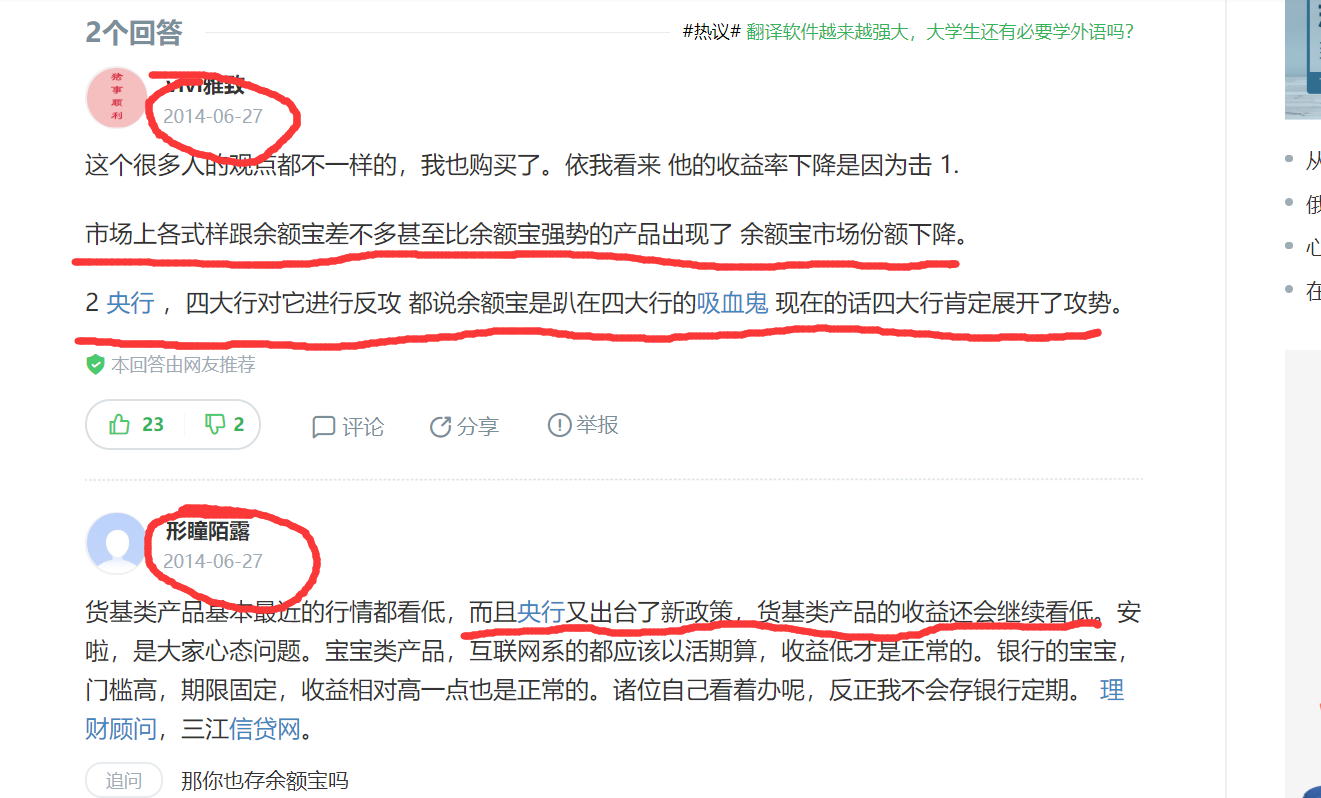

## 五、对于节假期的分析

1. The QingMing festerval (April.5 - April.7)
2. The Labour day      (May.1 - May.5)
3. The DuanWu festeval (May.31 - June.2)
4. The MidAutumn festeval (Sep.6 - Sep.8)

Others

1. Mother day(May.13)
2. Father day(June. 17)
3. TianMao 618 sales(June 10 - June 20)
4. Teachers' day(Sep 9)

In [35]:
# 获取节假日的数据

qingming = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2014,4,5))) & (total_balance['date'] < np.datetime64(datetime.date(2014,4,8)))]
labour = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2014,5,1))) & (total_balance['date'] < np.datetime64(datetime.date(2014,5,4)))]
duanwu = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2014,5,31))) & (total_balance['date'] < np.datetime64(datetime.date(2014,6,3)))]
data618 = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2014,6,10))) & (total_balance['date'] < np.datetime64(datetime.date(2014,6,20)))]

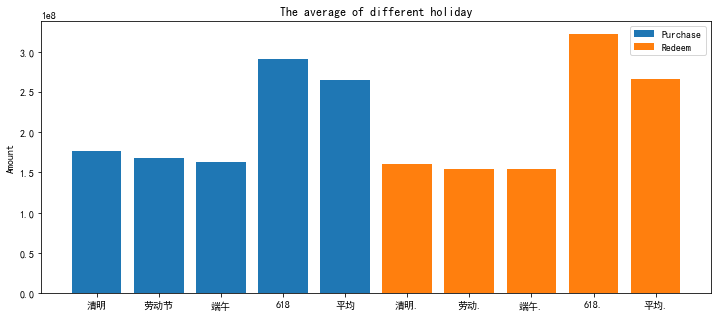

In [36]:
# 画出节假日与平时的均值

fig = plt.figure(figsize = (12,5))
index_list = ['清明','劳动节','端午','618','平均']
label_list = [np.mean(qingming['total_purchase_amt']), np.mean(labour['total_purchase_amt']),np.mean(duanwu['total_purchase_amt']),np.mean(data618['total_purchase_amt']),np.mean(total_balance_1['total_purchase_amt'])]
plt.bar(index_list, label_list, label="Purchase")

index_list = ['清明.','劳动.','端午.','618.','平均.']
label_list = [np.mean(qingming['total_redeem_amt']), np.mean(labour['total_redeem_amt']),np.mean(duanwu['total_redeem_amt']),np.mean(data618['total_redeem_amt']),np.mean(total_balance_1['total_redeem_amt'])]
plt.bar(index_list, label_list, label="Redeem")
plt.title("The average of different holiday")
plt.ylabel("Amount")
plt.legend()
plt.show()

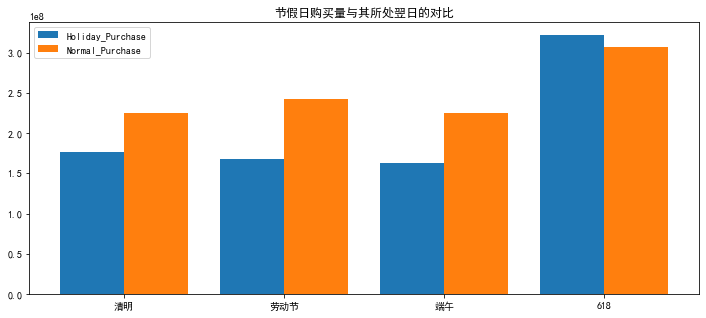

In [37]:
# 画出节假日购买量与其所处翌日的对比

plt.figure(figsize = (12,5))
import numpy as np
import matplotlib.pyplot as plt
size = 4
x = np.arange(size)

total_width, n = 0.8, 2    
width = total_width / n
x = x - (total_width - width) / 2

a = [176250006, 167825284, 162844282,321591063]
b = [225337516, 241859315, 225337516,307635449]

plt.bar(x, a,  width=width, label='Holiday_Purchase')
plt.bar(x + width, b, width=width, label='Normal_Purchase')
plt.xticks(x + width / 2, ('清明', '劳动节', '端午', '618'))
plt.title("节假日购买量与其所处翌日的对比")
plt.legend()
plt.show()

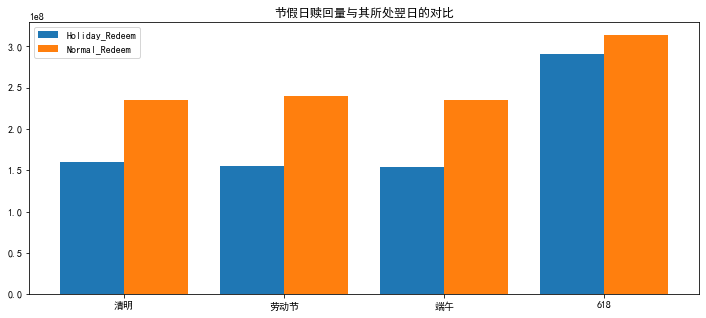

In [38]:
# 画出节假日赎回量与其所处翌日的对比
plt.figure(figsize = (12,5))
import numpy as np
import matplotlib.pyplot as plt
size = 4
x = np.arange(size)

total_width, n = 0.8, 2     
width = total_width / n
x = x - (total_width - width) / 2

a = [159914308, 154717620, 154366940,291016763]
b = [235439685, 240364238, 235439685,313310347]

plt.bar(x, a,  width=width, label='Holiday_Redeem')
plt.bar(x + width, b, width=width, label='Normal_Redeem')
plt.xticks(x + width / 2, ('清明', '劳动节', '端午', '618'))
plt.title("节假日赎回量与其所处翌日的对比")
plt.legend()
plt.show()

## 六、对于节假日周边日期的分析

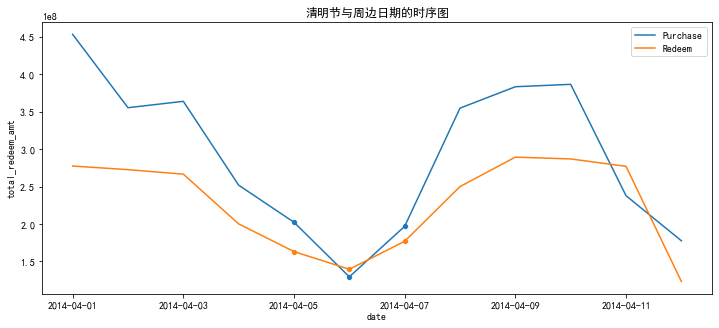

In [39]:
# 画出清明节与周边日期的时序图

plt.figure(figsize = (12,5))
qingming_around = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2014,4,1))) & (total_balance['date'] < np.datetime64(datetime.date(2014,4,13)))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=qingming_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=qingming_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=qingming, ax = ax)
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=qingming, ax=ax)
plt.title("清明节与周边日期的时序图")
ax.legend()

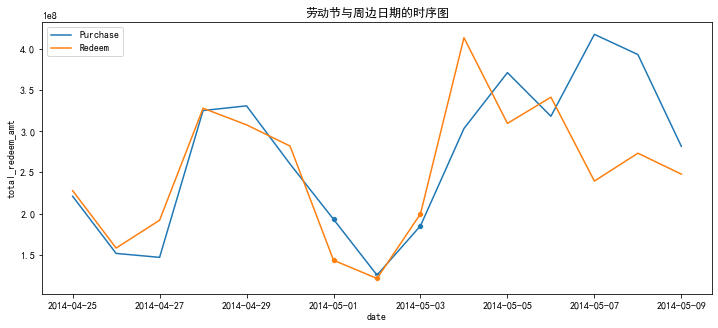

In [40]:
# 画出劳动节与周边日期的时序图

plt.figure(figsize = (12,5))
labour_around = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2014,4,25))) & (total_balance['date'] < np.datetime64(datetime.date(2014,5,10)))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=labour_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=labour_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=labour, ax=ax)
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=labour, ax=ax)
plt.title("劳动节与周边日期的时序图")
ax.legend()

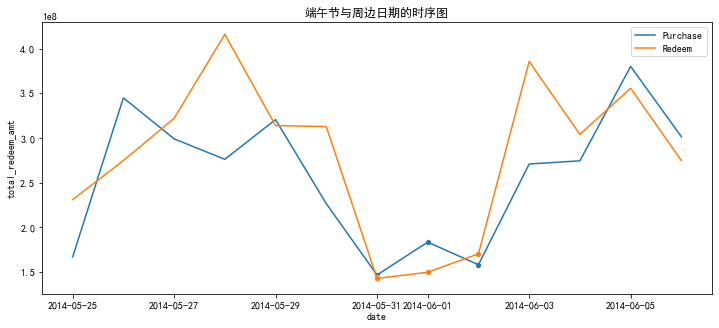

In [41]:
# 画出端午节与周边日期的时序图
plt.figure(figsize = (12,5))
duanwu_around = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2014,5,25))) & (total_balance['date'] < np.datetime64(datetime.date(2014,6,7)))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=duanwu_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=duanwu_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=duanwu, ax=ax)
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=duanwu, ax=ax)
plt.title("端午节与周边日期的时序图")
ax.legend()

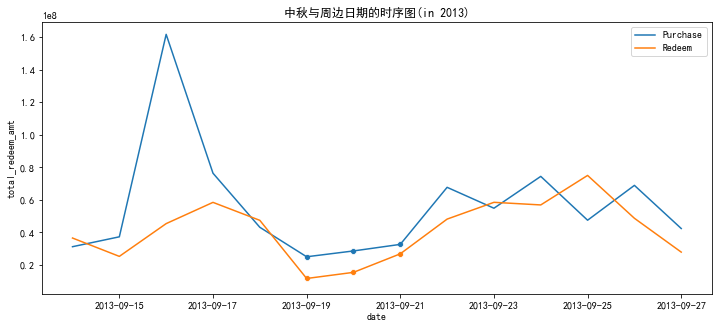

In [42]:
# 画出中秋与周边日期的时序图
plt.figure(figsize = (12,5))
zhongqiu = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2013,9,19))) & (total_balance['date'] < np.datetime64(datetime.date(2013,9,22)))]
zhongqiu_around = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2013,9,14))) & (total_balance['date'] < np.datetime64(datetime.date(2013,9,28)))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=zhongqiu_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=zhongqiu_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=zhongqiu, ax=ax)
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=zhongqiu, ax=ax)
plt.title("中秋与周边日期的时序图(in 2013)")
ax.legend()

## 七、对于异常值的分析

Text(0.5, 1.0, 'The abnormal value of total purchase')

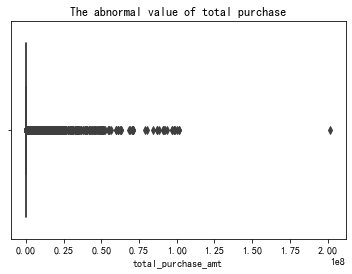

In [43]:
# 画出用户交易纪录的箱型图

sns.boxplot(data_balance['total_purchase_amt'])
plt.title("The abnormal value of total purchase")

In [44]:
# 对于购买2e8的用户的交易行为分析

data_balance[data_balance['user_id'] == 14592].sort_values(by = 'total_redeem_amt',axis = 0,ascending = False).head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,...,category1,category2,category3,category4,date,day,month,year,week,weekday
1453311,14592,20131104,99457728,0,201768328,201768328,201275171,493157,102310600,0,...,NaN,NaN,NaN,NaN,2013-11-04,4,11,2013,45,0
1453388,14592,20140616,0,98964529,1966014,1953569,0,1953569,100930543,0,...,NaN,NaN,NaN,NaN,2014-06-16,16,6,2014,25,0
1453227,14592,20131226,367063,98296082,17369,0,0,0,97946388,0,...,NaN,NaN,NaN,NaN,2013-12-26,26,12,2013,52,3
1453313,14592,20131105,97458675,99457728,4899446,4899446,4899446,0,6898499,0,...,NaN,NaN,NaN,NaN,2013-11-05,5,11,2013,45,1
1453355,14592,20140617,0,0,339679,339679,0,339679,339679,0,...,NaN,NaN,NaN,NaN,2014-06-17,17,6,2014,25,1


`
1311 Bought 2E Seal 1E
1312        Seal 1E
1405 Bought 0.9E
1406        Seal 1E
`

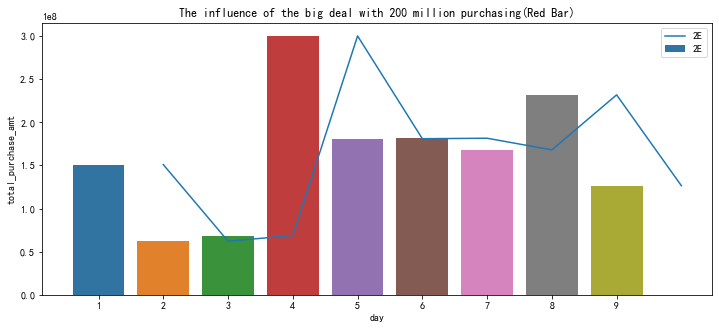

In [45]:
# 画出单笔交易为2e8的那天的总交易量及附近几天的交易量

plt.figure(figsize = (12,5))
e2 = total_balance[(total_balance['date'] >= np.datetime64(datetime.date(2013,11,1))) & (total_balance['date'] < np.datetime64(datetime.date(2013,11,10)))]
ax = sns.barplot(x="day", y="total_purchase_amt", data=e2, label='2E')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=e2, label='2E')
plt.title("The influence of the big deal with 200 million purchasing(Red Bar)")
ax.legend()

Text(0.5, 1.0, 'The Biggest deal happend in each day')

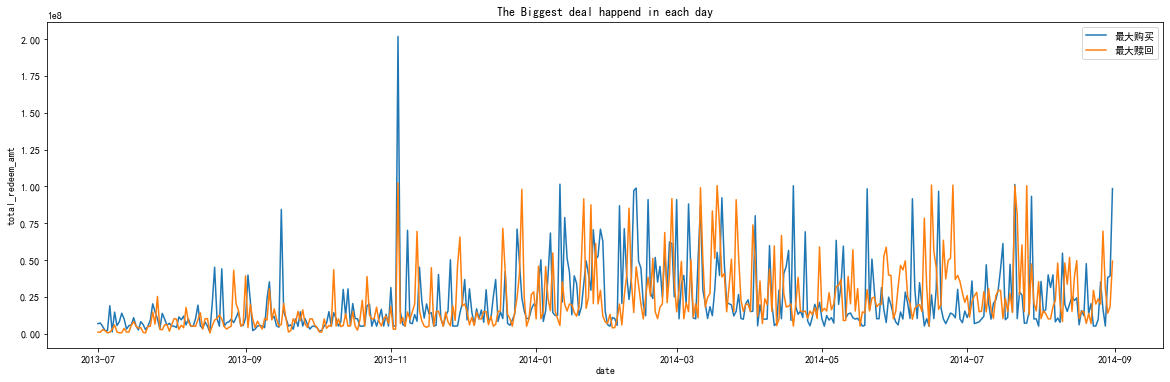

In [46]:
# 画出每日单笔最大交易的时序图

plt.figure(figsize=(20, 6))
ax = sns.lineplot(x="date", y="total_purchase_amt", data=data_balance[['total_purchase_amt', 'date']].groupby('date', as_index=False).max(), label='最大购买')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=data_balance[['total_redeem_amt', 'date']].groupby('date', as_index=False).max(), label='最大赎回')
plt.title("The Biggest deal happend in each day")

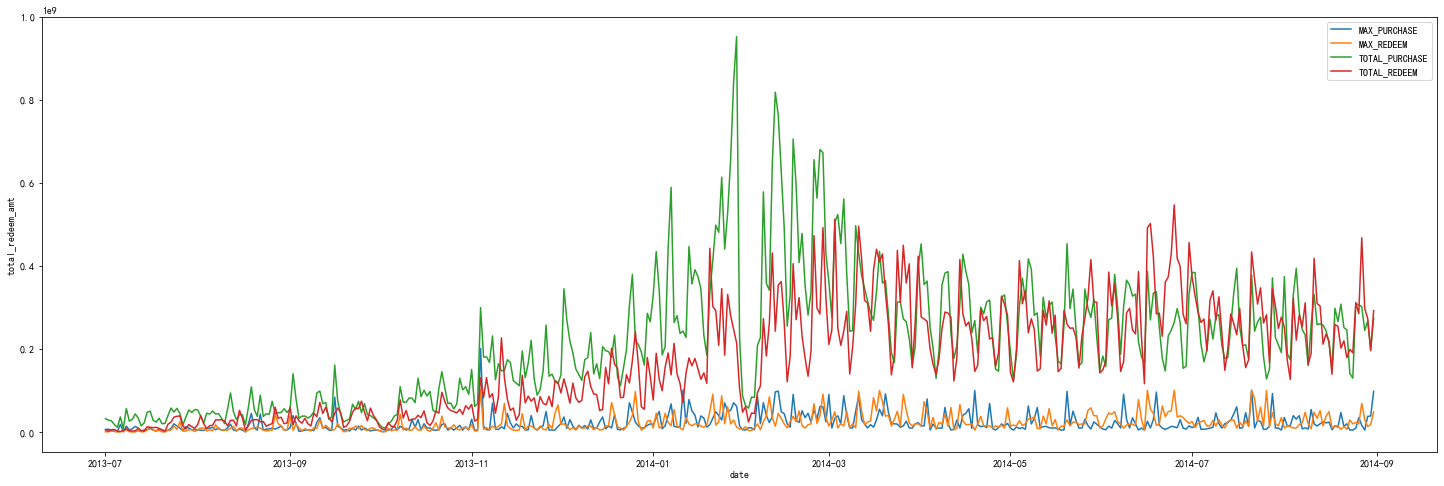

In [47]:
# 画出每日单笔最大交易以及总交易额的时序图

plt.figure(figsize=(25, 8))
ax = sns.lineplot(x="date", y="total_purchase_amt", data=data_balance[['total_purchase_amt', 'date']].groupby('date', as_index=False).max(), label='MAX_PURCHASE')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=data_balance[['total_redeem_amt', 'date']].groupby('date', as_index=False).max(), label='MAX_REDEEM')
ax = sns.lineplot(x="date", y="total_purchase_amt", data=data_balance[['total_purchase_amt', 'date']].groupby('date', as_index=False).sum(), label='TOTAL_PURCHASE')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=data_balance[['total_redeem_amt', 'date']].groupby('date', as_index=False).sum(), label='TOTAL_REDEEM')

Text(0.5, 1.0, 'The frequency of super big deal(larger than 100 million) in each month')

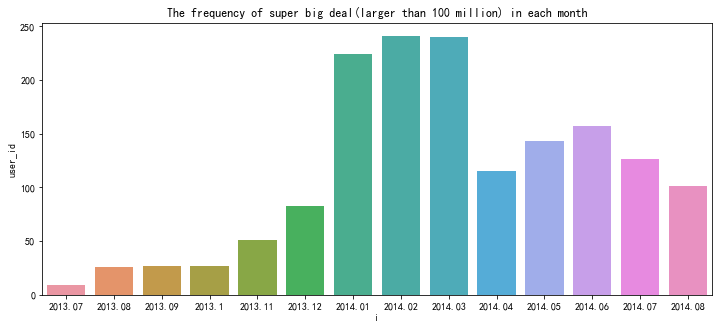

In [48]:
# 画出每个月大额交易的频次直方图

plt.figure(figsize=(12, 5))
big_frequancy = data_balance[(data_balance['total_purchase_amt'] > 10000000) | (data_balance['total_redeem_amt'] > 10000000)][['month','year','user_id']].groupby(['year','month'], as_index=False).count()
big_frequancy['i'] = big_frequancy['year']  + big_frequancy['month'] / 100
ax = sns.barplot(x="i", y="user_id", data=big_frequancy)
plt.title("The frequency of super big deal(larger than 100 million) in each month")

In [49]:
# 获取大额交易的数据集

data_balance['big_purchase'] = 0
data_balance.loc[data_balance['total_purchase_amt'] > 1000000, 'big_purchase'] = 1
data_balance['big_redeem'] = 0
data_balance.loc[data_balance['total_redeem_amt'] > 1000000, 'big_redeem'] = 1

In [50]:
# 对大额交易按每天做聚合操作

big_purchase = data_balance[data_balance['big_purchase'] == 1].groupby(['date'], as_index=False)['total_purchase_amt'].sum()
small_purchase = data_balance[data_balance['big_purchase'] == 0].groupby(['date'], as_index=False)['total_purchase_amt'].sum()
big_redeem = data_balance[data_balance['big_redeem'] == 1].groupby(['date'], as_index=False)['total_redeem_amt'].sum()
small_redeem = data_balance[data_balance['big_redeem'] == 0].groupby(['date'], as_index=False)['total_redeem_amt'].sum()

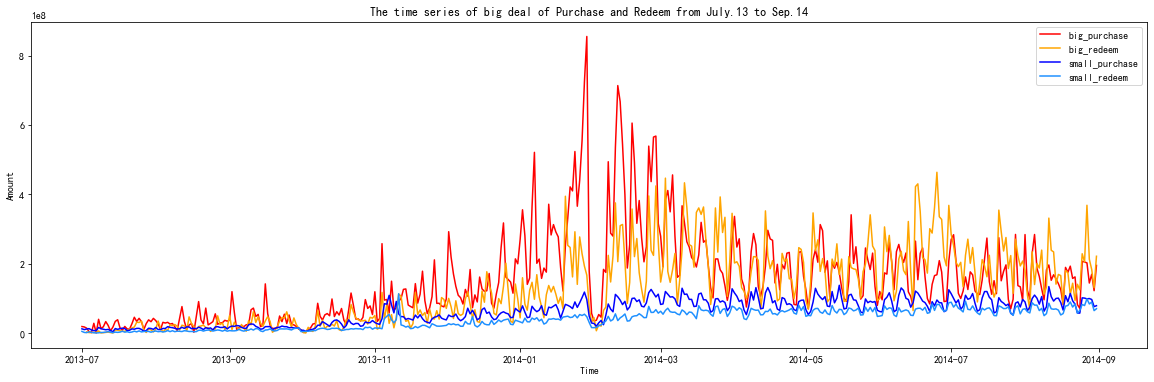

In [51]:
# 画出大额交易与小额交易的时序分布图

fig = plt.figure(figsize=(20,6))
plt.plot(big_purchase['date'], big_purchase['total_purchase_amt'],label='big_purchase', color = 'red')
plt.plot(big_redeem['date'], big_redeem['total_redeem_amt'],label='big_redeem', color = 'orange')

plt.plot(small_purchase['date'], small_purchase['total_purchase_amt'],label='small_purchase', color = 'blue')
plt.plot(small_redeem['date'], small_redeem['total_redeem_amt'],label='small_redeem', color = 'dodgerblue')
plt.legend(loc='best')
plt.title("The time series of big deal of Purchase and Redeem from July.13 to Sep.14")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

Text(0.5, 1.0, 'SMALL REDEEM')

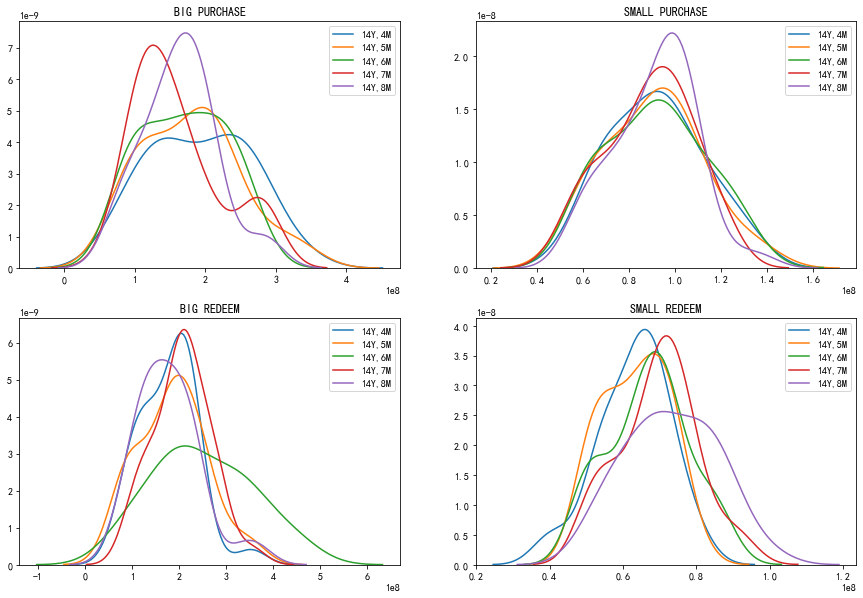

In [52]:
# 画出大额交易与小额交易的分布估计图

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
for i in range(4, 9):
    sns.kdeplot(big_purchase[(big_purchase['date'] >= np.datetime64(datetime.date(2014,i,1))) & (big_purchase['date'] < np.datetime64(datetime.date(2014,i+1,1)))]['total_purchase_amt'],label='14Y,'+str(i)+'M')
plt.title('BIG PURCHASE')

plt.subplot(2,2,2)
for i in range(4, 9):
    sns.kdeplot(small_purchase[(small_purchase['date'] >= np.datetime64(datetime.date(2014,i,1))) & (small_purchase['date'] < np.datetime64(datetime.date(2014,i+1,1)))]['total_purchase_amt'],label='14Y,'+str(i)+'M')
plt.title('SMALL PURCHASE')

plt.subplot(2,2,3)
for i in range(4, 9):
    sns.kdeplot(big_redeem[(big_redeem['date'] >= np.datetime64(datetime.date(2014,i,1))) & (big_redeem['date'] < np.datetime64(datetime.date(2014,i+1,1)))]['total_redeem_amt'],label='14Y,'+str(i)+'M')
plt.title('BIG REDEEM')

plt.subplot(2,2,4)
for i in range(4, 9):
    sns.kdeplot(small_redeem[(small_redeem['date'] >= np.datetime64(datetime.date(2014,i,1))) & (small_redeem['date'] < np.datetime64(datetime.date(2014,i+1,1)))]['total_redeem_amt'],label='14Y,'+str(i)+'M')
plt.title('SMALL REDEEM')

In [53]:
# 添加时间戳

big_purchase['weekday'] = big_purchase['date'].dt.weekday
small_purchase['weekday'] = small_purchase['date'].dt.weekday
big_redeem['weekday'] = big_redeem['date'].dt.weekday
small_redeem['weekday'] = small_redeem['date'].dt.weekday

Text(0.5, 1.0, 'SMALL REDEEM')

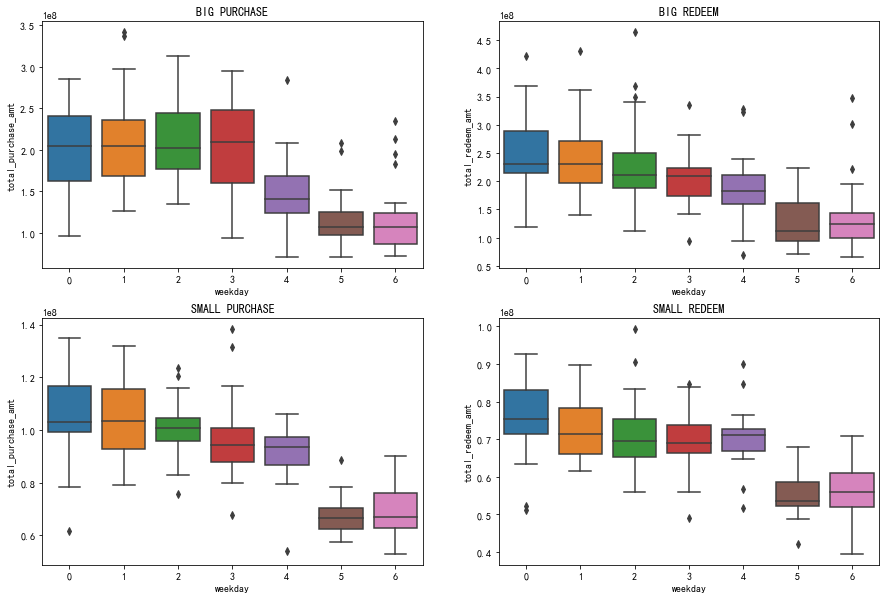

In [54]:
# 分析大额小额的翌日分布

plt.figure(figsize=(15, 10))

ax = plt.subplot(2,2,1)
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=big_purchase[big_purchase['date'] >= np.datetime64(datetime.date(2014,4,1))])
plt.title('BIG PURCHASE')

ax = plt.subplot(2,2,2)
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=big_redeem[big_redeem['date'] >= np.datetime64(datetime.date(2014,4,1))])
plt.title('BIG REDEEM')

ax = plt.subplot(2,2,3)
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=small_purchase[small_purchase['date'] >= np.datetime64(datetime.date(2014,4,1))])
plt.title('SMALL PURCHASE')

ax = plt.subplot(2,2,4)
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=small_redeem[small_redeem['date'] >= np.datetime64(datetime.date(2014,4,1))])
plt.title('SMALL REDEEM')

## 八、分析用户交易纪录表中其他变量

In [55]:
# 截断数据集

data_balance_1 = data_balance[data_balance['date'] > datetime.datetime(2014,4,1)]

Text(0.5, 1, 'The coleration between each feature in User_Balance_Table')

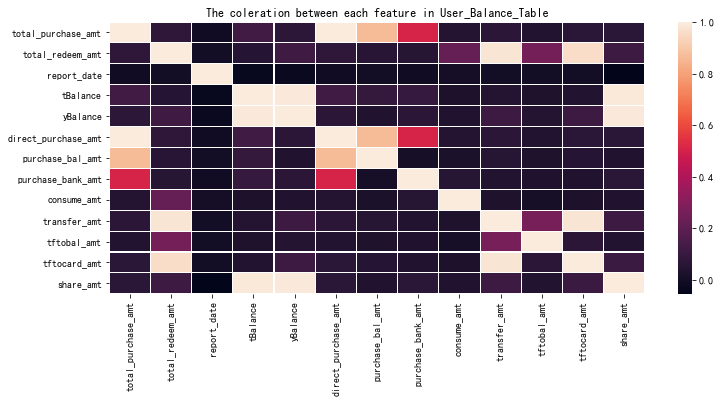

In [56]:
# 画出用户交易纪录表中其他变量与标签的相关性图


plt.figure(figsize = (12,5))
feature = ['total_purchase_amt','total_redeem_amt', 'report_date', 'tBalance', 'yBalance', 
       'direct_purchase_amt', 'purchase_bal_amt', 'purchase_bank_amt',
        'consume_amt', 'transfer_amt', 'tftobal_amt',
       'tftocard_amt', 'share_amt']

sns.heatmap(data_balance_1[feature].corr(), linewidths = 0.1)   
plt.title("The coleration between each feature in User_Balance_Table")

## 九、对于银行及支付宝利率的分析

In [57]:
# 读取银行利率并添加时间戳

bank = pd.read_csv(dataset_path + "mfd_bank_shibor.csv")
bank = bank.rename(columns = {'mfd_date': 'date'})
bank_features = [x for x in bank.columns if x not in ['date']]
bank['date'] = pd.to_datetime(bank['date'], format= "%Y%m%d")
bank['day'] = bank['date'].dt.day
bank['month'] = bank['date'].dt.month
bank['year'] = bank['date'].dt.year
bank['week'] = bank['date'].dt.week
bank['weekday'] = bank['date'].dt.weekday

In [58]:
# 读取支付宝利率并添加时间戳

share = pd.read_csv(dataset_path + 'mfd_day_share_interest.csv')
share = share.rename(columns = {'mfd_date': 'date'})
share_features = [x for x in share.columns if x not in ['date']]
share['date'] = pd.to_datetime(share['date'], format= "%Y%m%d")
share['day'] = share['date'].dt.day
share['month'] = share['date'].dt.month
share['year'] = share['date'].dt.year
share['week'] = share['date'].dt.week
share['weekday'] = share['date'].dt.weekday

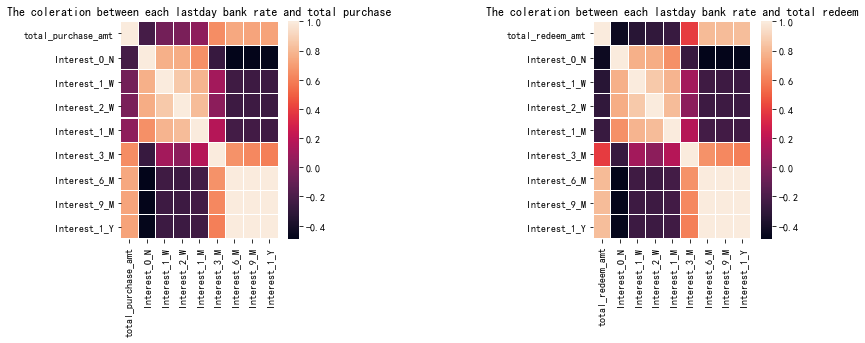

In [59]:
# 画出上一天银行及支付宝利率与标签的相关性图

bank['last_date'] = bank['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("The coleration between each lastday bank rate and total purchase")
temp = pd.merge(bank[['last_date']+bank_features], total_balance, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  
plt.subplot(1,3,3)
plt.title("The coleration between each lastday bank rate and total redeem")
temp = pd.merge(bank[['last_date']+bank_features], total_balance, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  

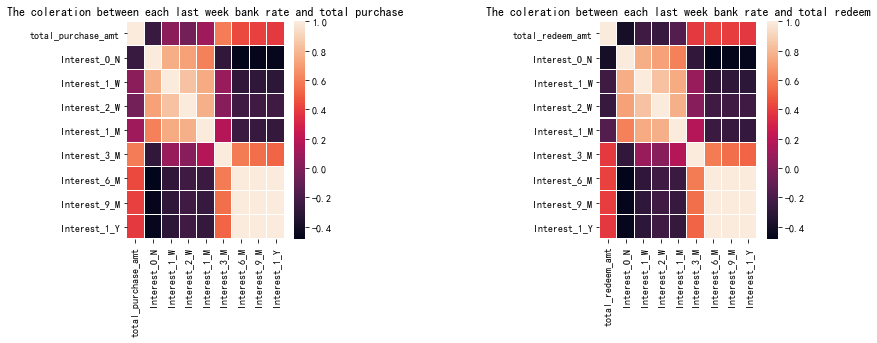

In [60]:
# 画出上一星期银行及支付宝利率与标签的相关性图

bank['last_week'] = bank['week'] + 1
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("The coleration between each last week bank rate and total purchase")
temp = pd.merge(bank[['last_week','weekday']+bank_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  
plt.subplot(1,3,3)
plt.title("The coleration between each last week bank rate and total redeem")
temp = pd.merge(bank[['last_week','weekday']+bank_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05) 

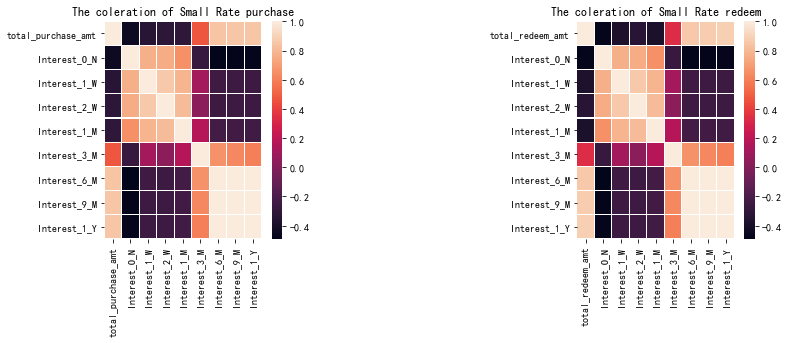

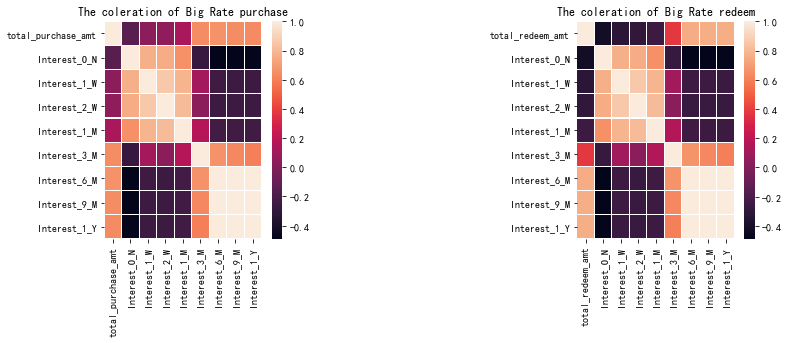

In [61]:
# 分别画出上一星期银行及支付宝利率与大额小额数据的相关性图

bank['last_date'] = bank['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("The coleration of Small Rate purchase")
temp = pd.merge(bank[['last_date']+bank_features], small_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  
plt.subplot(1,3,3)
plt.title("The coleration of Small Rate redeem")
temp = pd.merge(bank[['last_date']+bank_features], small_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  

bank['last_date'] = bank['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("The coleration of Big Rate purchase")
temp = pd.merge(bank[['last_date']+bank_features], big_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  
plt.subplot(1,3,3)
plt.title("The coleration of Big Rate redeem")
temp = pd.merge(bank[['last_date']+bank_features], big_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05)  

Text(0, 0.5, 'Rate')

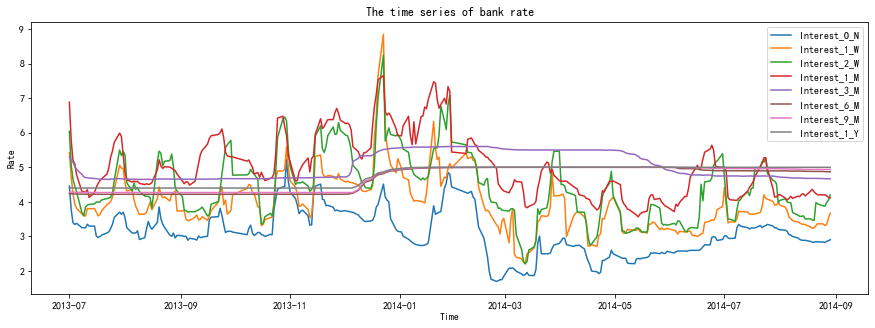

In [62]:
# 画出银行利率的时序图

plt.figure(figsize=(15,5))
for i in bank_features:
    plt.plot(bank['date'], bank[[i]] ,label=i)
plt.legend()
plt.title("The time series of bank rate")
plt.xlabel("Time")
plt.ylabel("Rate")

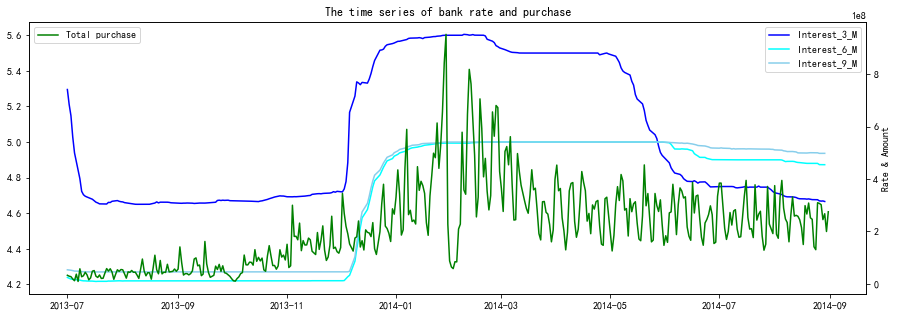

In [63]:
# 画出部分银行利率与购买量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(bank['date'], bank['Interest_3_M'],'b',label="Interest_3_M")
plt.plot(bank['date'], bank['Interest_6_M'],'cyan',label="Interest_6_M")
plt.plot(bank['date'], bank['Interest_9_M'],'skyblue',label="Interest_9_M")

plt.legend()

ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],'g',label="Total purchase")

plt.legend(loc=2)
plt.title("The time series of bank rate and purchase")
plt.xlabel("Time")
plt.ylabel("Rate & Amount")
plt.show()


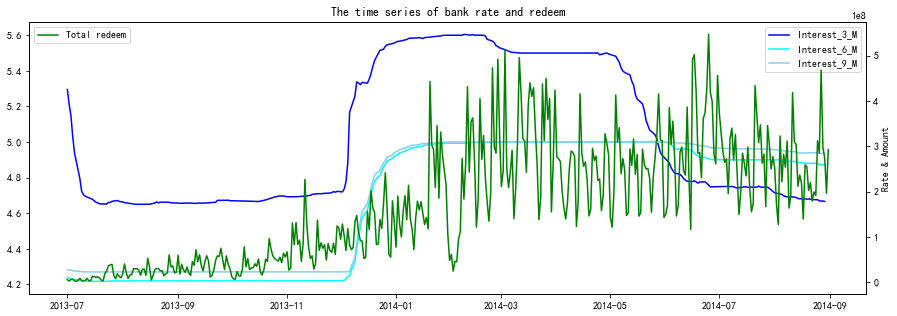

In [64]:
# 画出部分银行利率与赎回量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(bank['date'], bank['Interest_3_M'],'b',label="Interest_3_M")
plt.plot(bank['date'], bank['Interest_6_M'],'cyan',label="Interest_6_M")
plt.plot(bank['date'], bank['Interest_9_M'],'skyblue',label="Interest_9_M")

plt.legend()

ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],'g',label="Total redeem")

plt.legend(loc=2)
plt.title("The time series of bank rate and redeem")
plt.xlabel("Time")
plt.ylabel("Rate & Amount")

plt.show()


## The information for Share rate

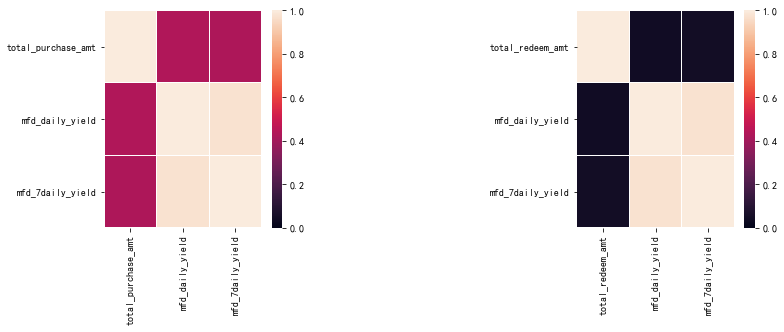

In [65]:
# 画出支付宝利率与标签的相关性图

share['last_date'] = share['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
temp = pd.merge(share[['last_date']+share_features], total_balance, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0)  
plt.subplot(1,3,3)
temp = pd.merge(share[['last_date']+share_features], total_balance, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0)  

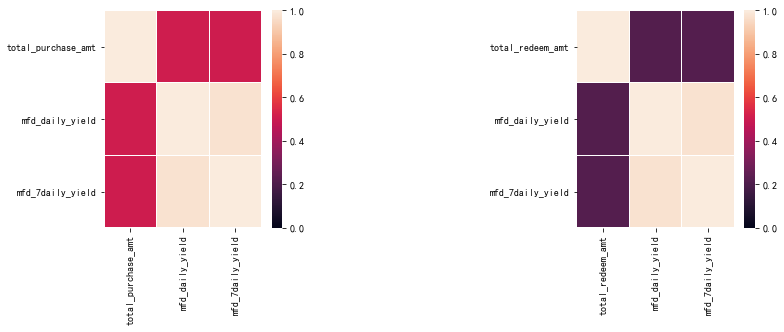

In [66]:
# 画出银行利率与标签的相关性图

share['last_week'] = share['week'] + 1
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
temp = pd.merge(share[['last_week','weekday']+share_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0)  
plt.subplot(1,3,3)
temp = pd.merge(share[['last_week','weekday']+share_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0) 

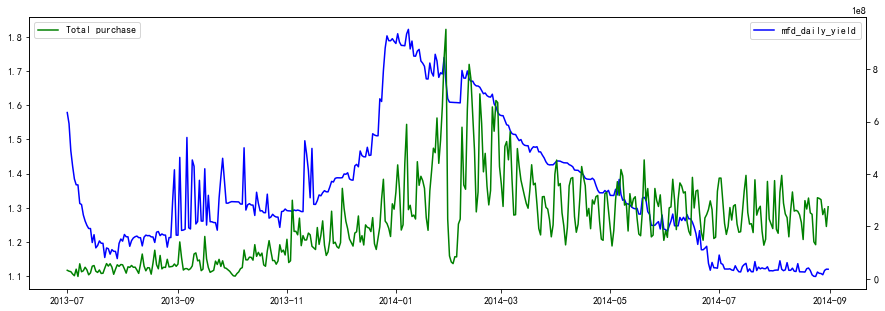

In [67]:
# 画出支付宝利率与购买量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
for i in share_features:
    plt.plot(share['date'], share[i],'b',label=i)
    break
plt.legend()
ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],'g',label="Total purchase")
plt.legend(loc=2)
plt.show()

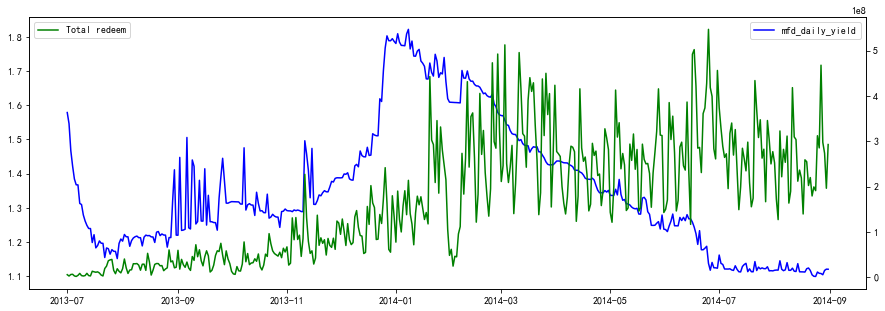

In [68]:
# 画出支付宝利率与赎回量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
for i in share_features:
    plt.plot(share['date'], share[i],'b',label=i)
    break
plt.legend()
ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],'g',label="Total redeem")
plt.legend(loc=2)
plt.show()

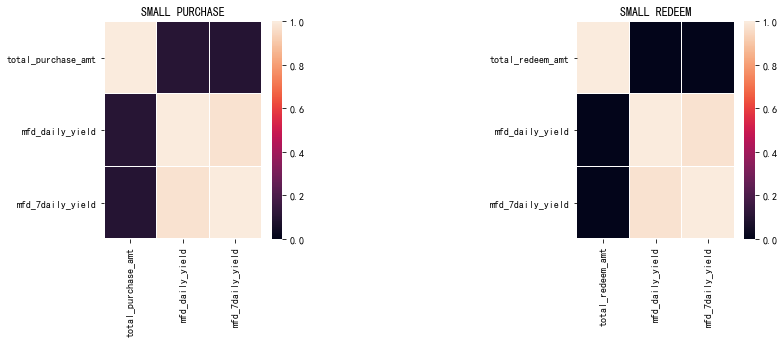

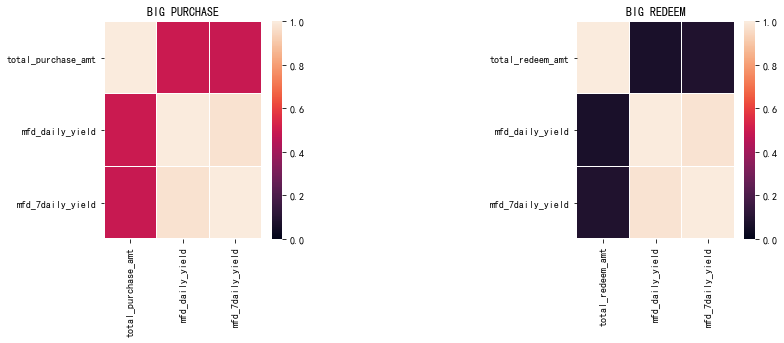

In [69]:
# 画出大额小额数据与支付宝利率的相关性图

share['last_date'] = share['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
temp = pd.merge(share[['last_date']+share_features], small_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0)  
plt.title("SMALL PURCHASE")
plt.subplot(1,3,3)
plt.title("SMALL REDEEM")
temp = pd.merge(share[['last_date']+share_features], small_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0)  

share['last_date'] = share['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("BIG PURCHASE")
temp = pd.merge(share[['last_date']+share_features], big_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0)  
plt.subplot(1,3,3)
plt.title("BIG REDEEM")
temp = pd.merge(share[['last_date']+share_features], big_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0)  

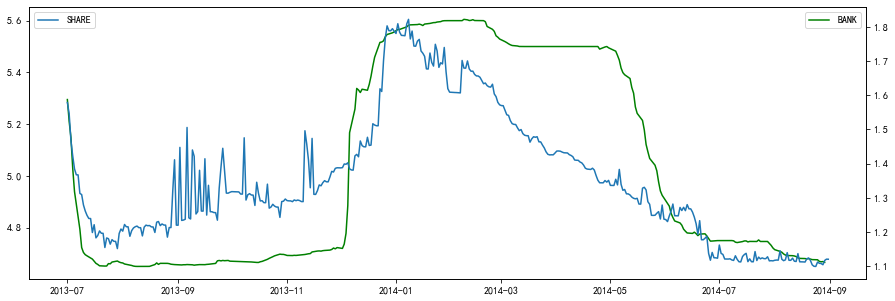

In [70]:
# 画出银行利率与支付宝利率的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(bank['date'], bank['Interest_3_M'],c='g',label= 'BANK')

plt.legend()
ax2=ax1.twinx()
plt.plot(share['date'], share['mfd_daily_yield'],label='SHARE')
plt.legend(loc=2)
plt.show()

It seems that:

1. The influence of share is more likely to act on Purchase
2. The influence of bank rate is more likely to act on Redeem
1. The influence of share rate is for short
2. The influence of bank rate is for long


#### based on above analysis, we can simply find these features:

1. the weekday
2. is it weekend
3. is it holidy
5. the distance from the start of week(monday)
6. the distance from the end of week(sunday)
7. the distance from the holiday centre(centre of QingMing DuanWu Labour ZhongQiu)
8. the distance from the start of month
9. the distance from the end of month
10. the mean/max/min value of the same week in last month
11. the value in last day of last month